In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/loan-default-dataset/Loan_Default.csv


In [2]:
df = pd.read_csv("/kaggle/input/loan-default-dataset/Loan_Default.csv")
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

# Handling Null Values:

In [4]:
df.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

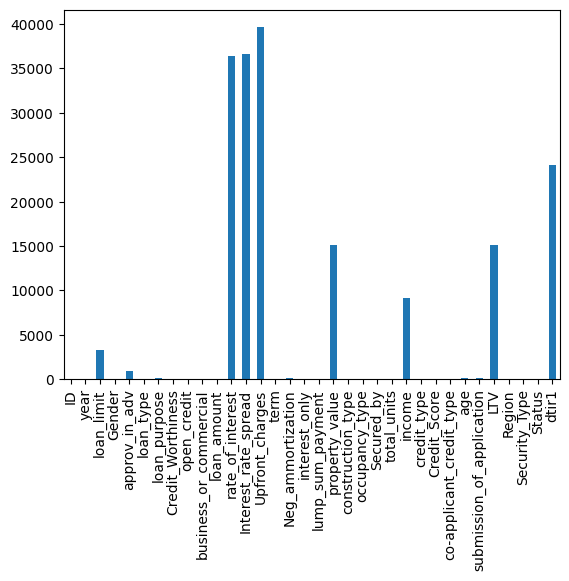

In [5]:
df.isna().sum().plot.bar()
plt.show()

Removing columns ID and year.

In [6]:
df = df.drop(["ID","year"], axis = "columns")
df.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [7]:
df.nunique().sum

<bound method Series.sum of loan_limit                       2
Gender                           4
approv_in_adv                    2
loan_type                        3
loan_purpose                     4
Credit_Worthiness                2
open_credit                      2
business_or_commercial           2
loan_amount                    211
rate_of_interest               131
Interest_rate_spread         22516
Upfront_charges              58271
term                            26
Neg_ammortization                2
interest_only                    2
lump_sum_payment                 2
property_value                 385
construction_type                2
occupancy_type                   3
Secured_by                       2
total_units                      4
income                        1001
credit_type                      4
Credit_Score                   401
co-applicant_credit_type         2
age                              7
submission_of_application        2
LTV                        

In [8]:
cat_vars = []
num_vars = []
for i in df.columns:
    if(df[i].dtype == "object"):
        cat_vars.append(i)
    else:
        num_vars.append(i)
print("Categorical Variables:\n",cat_vars,"\n")
print("Numerical Variables:\n",num_vars,"\n")

Categorical Variables:
 ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type'] 

Numerical Variables:
 ['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1'] 



## Imputing Numericals vars:

In [9]:
df_num = df[num_vars]
knn = KNNImputer(n_neighbors = 3)
knn.fit(df_num)
X = knn.fit_transform(df_num)


In [10]:
X

array([[ 1.16500000e+05,  3.58333333e+00, -3.12666667e-02, ...,
         9.87288136e+01,  1.00000000e+00,  4.50000000e+01],
       [ 2.06500000e+05,  3.70833333e+00,  5.22966667e-01, ...,
         8.47955494e+01,  1.00000000e+00,  3.46666667e+01],
       [ 4.06500000e+05,  4.56000000e+00,  2.00000000e-01, ...,
         8.00196850e+01,  0.00000000e+00,  4.60000000e+01],
       ...,
       [ 4.46500000e+05,  3.12500000e+00,  8.16000000e-02, ...,
         6.13324176e+01,  0.00000000e+00,  4.90000000e+01],
       [ 1.96500000e+05,  3.50000000e+00,  5.82400000e-01, ...,
         7.06834532e+01,  0.00000000e+00,  2.90000000e+01],
       [ 4.06500000e+05,  4.37500000e+00,  1.38710000e+00, ...,
         7.28494624e+01,  0.00000000e+00,  4.40000000e+01]])

In [11]:
df_num = pd.DataFrame(X, columns=num_vars)
df_num.isna().sum()

loan_amount             0
rate_of_interest        0
Interest_rate_spread    0
Upfront_charges         0
term                    0
property_value          0
income                  0
Credit_Score            0
LTV                     0
Status                  0
dtir1                   0
dtype: int64

## Imputing Categorical vars:

In [12]:
df_cat = df[cat_vars]
for i in cat_vars:
    mode = df[i].mode()
    mode = mode[0]
    df_cat[i].fillna(value=mode, inplace=True)

df_cat.isna().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
credit_type                  0
co-applicant_credit_type     0
age                          0
submission_of_application    0
Region                       0
Security_Type                0
dtype: int64

Joining both dataframes:

In [13]:
df_full = pd.concat([df_num, df_cat], axis=1, join='inner')
df_full.isna().sum()

loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
property_value               0
income                       0
Credit_Score                 0
LTV                          0
Status                       0
dtir1                        0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
credit_type                  0
co-applicant_credit_type     0
age                          0
submission_of_application    0
Region                       0
Security_Type                0
dtype: i

# Outlier Detection and Removal:

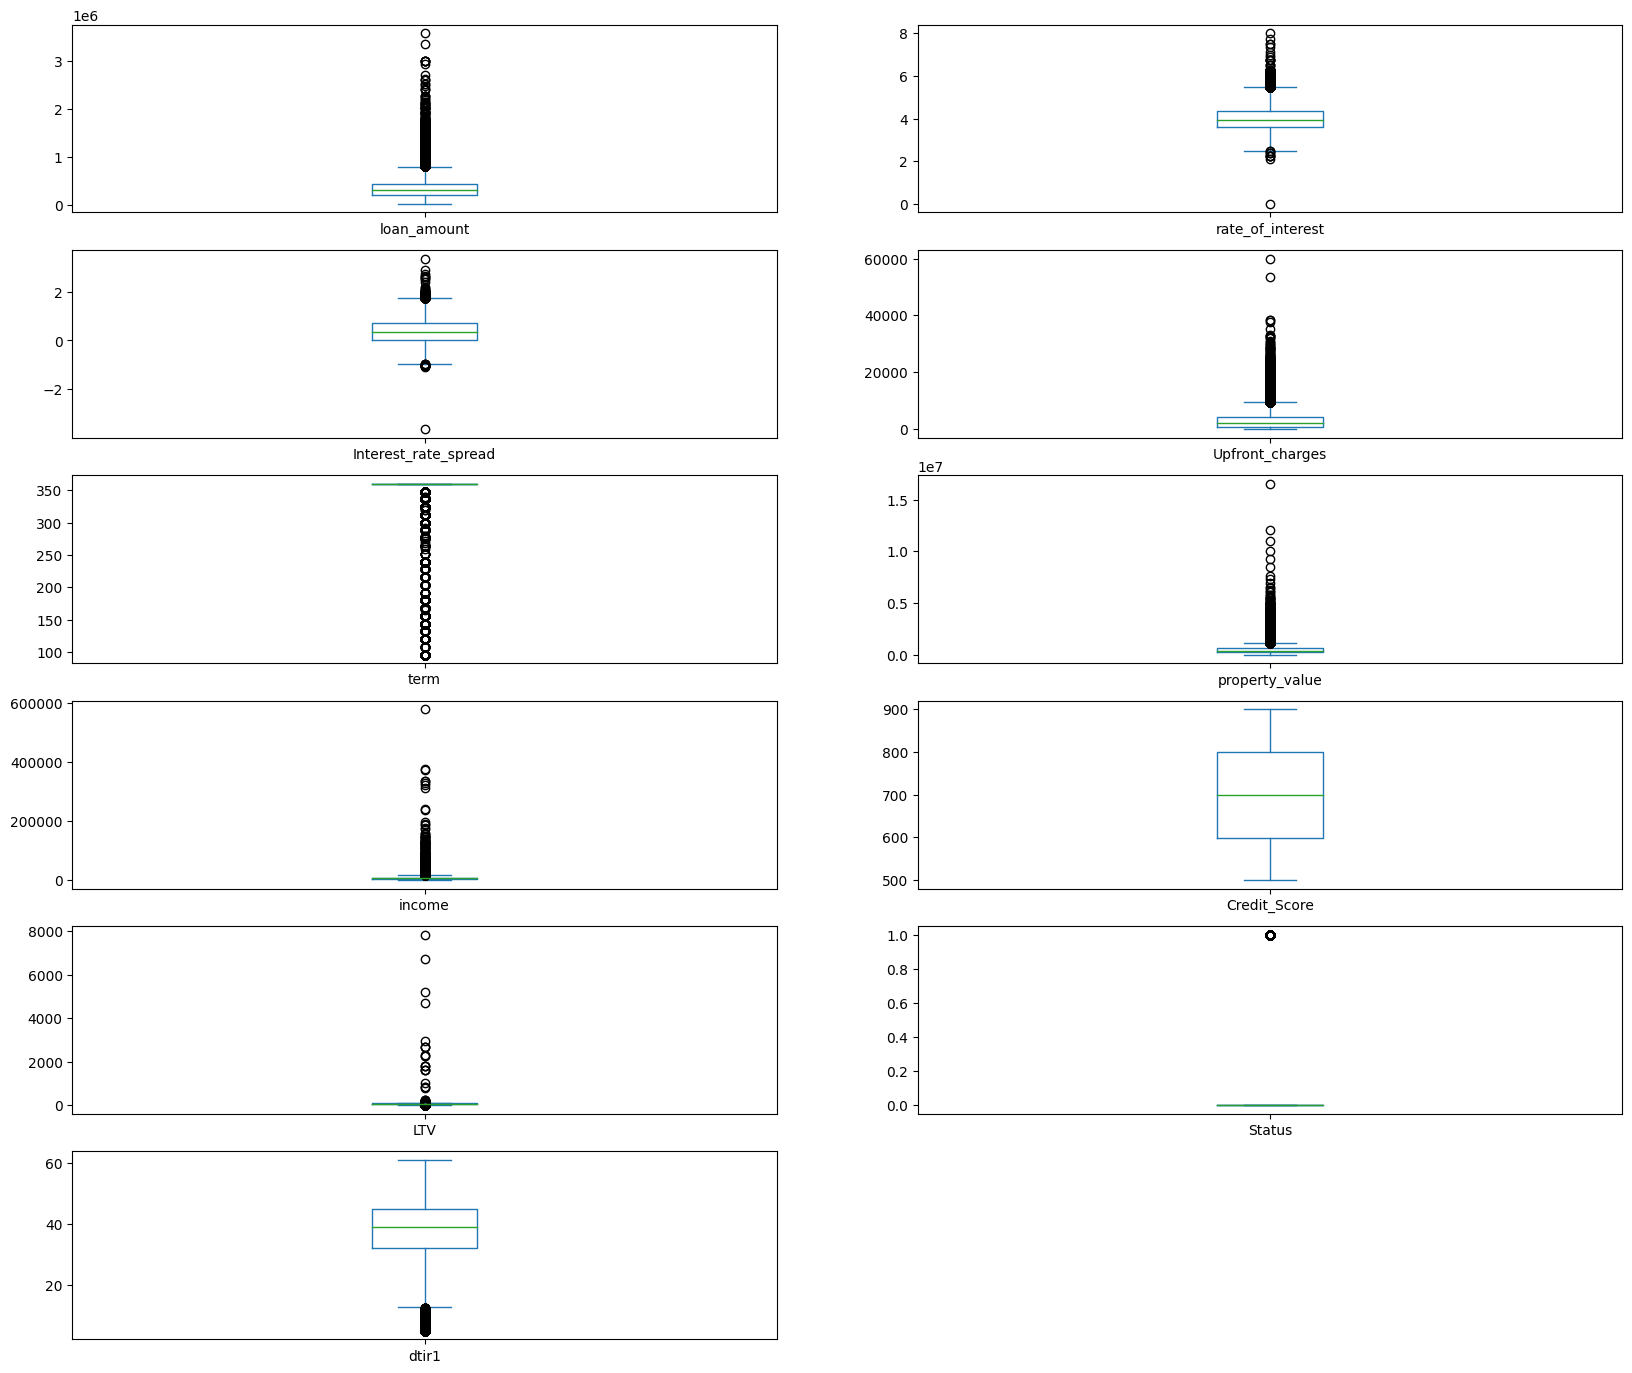

In [14]:
df_full.plot(kind="box",subplots=True,layout=(7,2),figsize=(20,20));

Inference: Almost all numerical variables have outliers present except for Credit_Score.

Plots after removing outliers:



loan_amount                Axes(0.125,0.786098;0.352273x0.0939024)
rate_of_interest        Axes(0.547727,0.786098;0.352273x0.0939024)
Interest_rate_spread       Axes(0.125,0.673415;0.352273x0.0939024)
Upfront_charges         Axes(0.547727,0.673415;0.352273x0.0939024)
term                       Axes(0.125,0.560732;0.352273x0.0939024)
property_value          Axes(0.547727,0.560732;0.352273x0.0939024)
income                     Axes(0.125,0.448049;0.352273x0.0939024)
Credit_Score            Axes(0.547727,0.448049;0.352273x0.0939024)
LTV                        Axes(0.125,0.335366;0.352273x0.0939024)
Status                  Axes(0.547727,0.335366;0.352273x0.0939024)
dtir1                      Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

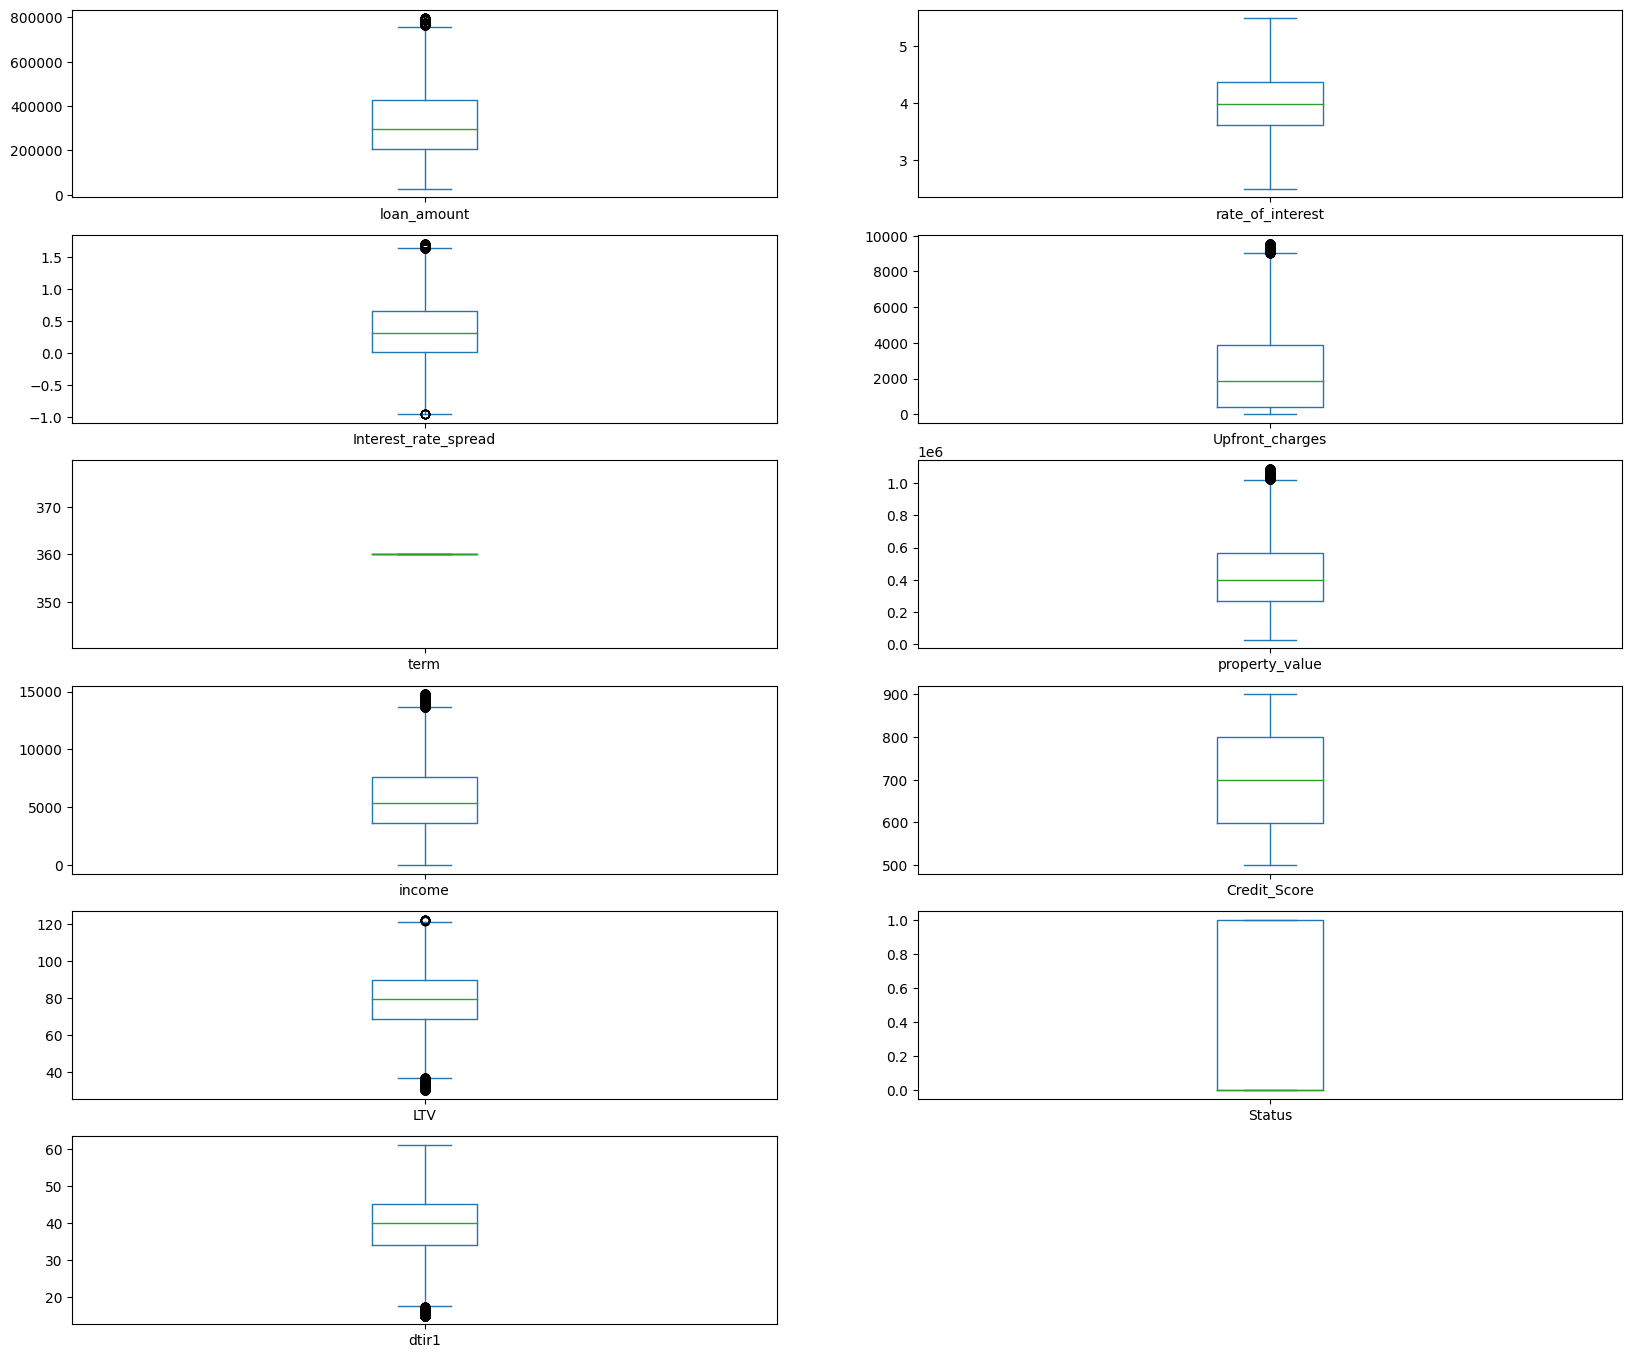

In [15]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    upper_bound = iqr + np.percentile(df[field_name], 75)
    lower_bound = np.percentile(df[field_name], 25) - iqr

    if ((df[field_name] > upper_bound) | (df[field_name] < lower_bound)).empty:
        print("No outliers to drop.")
        return

    df.drop(df[(df[field_name] > upper_bound) | (df[field_name] < lower_bound)].index, inplace=True)

drop_outliers(df_full, "loan_amount")
drop_outliers(df_full, "rate_of_interest")
drop_outliers(df_full, "Interest_rate_spread")
drop_outliers(df_full, "Upfront_charges")
drop_outliers(df_full, "property_value")
drop_outliers(df_full, "income")
drop_outliers(df_full, "LTV")
drop_outliers(df_full, "Status")
drop_outliers(df_full, "term")
drop_outliers(df_full, "dtir1")

print("Plots after removing outliers:\n")
df_full.plot(kind="box", subplots=True, layout=(7,2), figsize=(20,20))


Inference: Outliers have been removed.

In [16]:
df_full.shape

(102473, 32)

<Axes: >

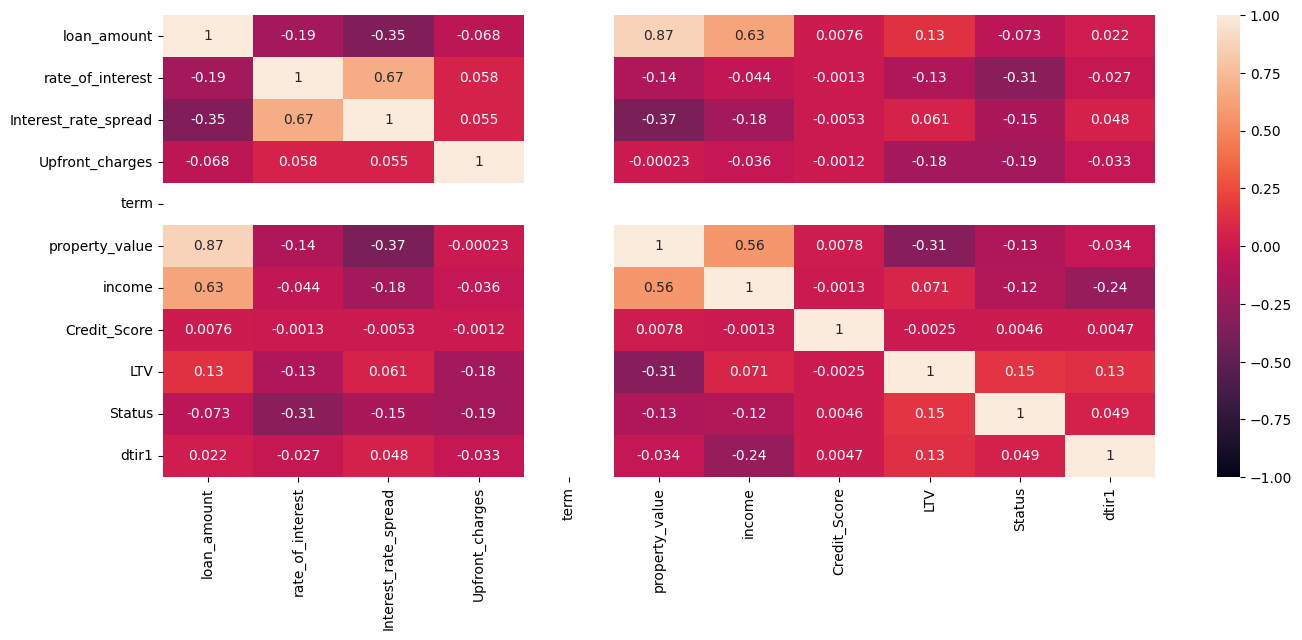

In [17]:
corr = df_full[num_vars].corr()
plt.figure(figsize=(16, 6))
sns.heatmap(data = corr, vmin=-1, vmax=1, annot=True)

Inference: High positive Correlation can be seen between property_value and loan_amount .

# Encoding Categorical Variables:

In [18]:
print(df_full[cat_vars].nunique().sum)

<bound method Series.sum of loan_limit                   2
Gender                       4
approv_in_adv                2
loan_type                    3
loan_purpose                 4
Credit_Worthiness            2
open_credit                  2
business_or_commercial       2
Neg_ammortization            2
interest_only                2
lump_sum_payment             2
construction_type            2
occupancy_type               3
Secured_by                   2
total_units                  4
credit_type                  4
co-applicant_credit_type     2
age                          7
submission_of_application    2
Region                       4
Security_Type                2
dtype: int64>


In [19]:
label = LabelEncoder()
for i in cat_vars:
    df_full[i] = label.fit_transform(df_full[i])

In [20]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102473 entries, 0 to 148666
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_amount                102473 non-null  float64
 1   rate_of_interest           102473 non-null  float64
 2   Interest_rate_spread       102473 non-null  float64
 3   Upfront_charges            102473 non-null  float64
 4   term                       102473 non-null  float64
 5   property_value             102473 non-null  float64
 6   income                     102473 non-null  float64
 7   Credit_Score               102473 non-null  float64
 8   LTV                        102473 non-null  float64
 9   Status                     102473 non-null  float64
 10  dtir1                      102473 non-null  float64
 11  loan_limit                 102473 non-null  int64  
 12  Gender                     102473 non-null  int64  
 13  approv_in_adv              102473 

Data is cleaned now

# Train test split

In [21]:
train_set, test_set = train_test_split(df_full, test_size=0.2, random_state=42)

y_train = train_set['Status']
X_train = train_set.drop(columns=['Status'])
y_test = test_set['Status']
X_test = test_set.drop(columns=['Status'])

In [22]:
print("Shape of x_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (81978, 31)
Shape of y_train:  (81978,)
Shape of x_test:  (20495, 31)
Shape of y_test:  (20495,)


# Initialzing Boosting Models:

In [23]:
gdb = GradientBoostingClassifier(random_state = 42)
adab = AdaBoostClassifier(random_state = 42)
lgb = LGBMClassifier(random_state = 42)
catb = CatBoostClassifier(random_state = 42)
xgb = XGBClassifier(random_state = 42)

# Gradient Boosting:

In [24]:
gdb.fit(X_train, y_train)
y_pred_gdb = gdb.predict(X_test)
print('Accuracy :',accuracy_score(y_test, y_pred_gdb))
print("\n")
print(classification_report(y_test, y_pred_gdb))

Accuracy : 0.9369114418150768


              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     15339
         1.0       0.97      0.77      0.86      5156

    accuracy                           0.94     20495
   macro avg       0.95      0.88      0.91     20495
weighted avg       0.94      0.94      0.93     20495



# XGBoost:

In [25]:
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print('Accuracy :',accuracy_score(y_test, y_pred_xgb))
print("\n")
print(classification_report(y_test, y_pred_xgb))

Accuracy : 0.9747743352037083


              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     15339
         1.0       0.98      0.92      0.95      5156

    accuracy                           0.97     20495
   macro avg       0.98      0.96      0.97     20495
weighted avg       0.97      0.97      0.97     20495



Using SelectFromModel approach on XGBoost to select features with specified threshold of importance.

In [26]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(xgb)

xgb2 = sfm.fit(X_train, y_train)
selected_features = X_train.columns[sfm.get_support()]
print(selected_features)

Index(['rate_of_interest', 'loan_type', 'Neg_ammortization',
       'lump_sum_payment', 'credit_type', 'submission_of_application'],
      dtype='object')


# LightGBM:

In [27]:
lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_test)
print('Accuracy :',accuracy_score(y_test, y_pred_lgb))
print("\n")
print(classification_report(y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 20577, number of negative: 61401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1901
[LightGBM] [Info] Number of data points in the train set: 81978, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.251006 -> initscore=-1.093252
[LightGBM] [Info] Start training from score -1.093252
Accuracy : 0.9813125152476214


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     15339
         1.0       0.99      0.94      0.96      5156

    accuracy                           0.98     20495
   macro avg       0.98      0.97      0.97     20495
weighted avg       0.98      0.98      0.98     20495



# CatBoost:

In [28]:
catb.fit(X_train, y_train)
y_pred_catb = catb.predict(X_test)
print('Accuracy :',accuracy_score(y_test, y_pred_catb))
print("\n")
print(classification_report(y_test, y_pred_catb))

Learning rate set to 0.067621
0:	learn: 0.6194468	total: 74.6ms	remaining: 1m 14s
1:	learn: 0.5619323	total: 97.2ms	remaining: 48.5s
2:	learn: 0.5273232	total: 115ms	remaining: 38.1s
3:	learn: 0.4999902	total: 133ms	remaining: 33.1s
4:	learn: 0.4751753	total: 150ms	remaining: 29.9s
5:	learn: 0.4530342	total: 168ms	remaining: 27.8s
6:	learn: 0.4239151	total: 187ms	remaining: 26.6s
7:	learn: 0.3981619	total: 204ms	remaining: 25.3s
8:	learn: 0.3834097	total: 220ms	remaining: 24.2s
9:	learn: 0.3718269	total: 237ms	remaining: 23.4s
10:	learn: 0.3558495	total: 253ms	remaining: 22.7s
11:	learn: 0.3457303	total: 270ms	remaining: 22.2s
12:	learn: 0.3354237	total: 286ms	remaining: 21.7s
13:	learn: 0.3277177	total: 302ms	remaining: 21.3s
14:	learn: 0.3201628	total: 317ms	remaining: 20.8s
15:	learn: 0.3085839	total: 334ms	remaining: 20.5s
16:	learn: 0.3016052	total: 349ms	remaining: 20.2s
17:	learn: 0.2965985	total: 365ms	remaining: 19.9s
18:	learn: 0.2907999	total: 384ms	remaining: 19.8s
19:	lear

# AdaBoost:

In [29]:
from sklearn.tree import DecisionTreeClassifier
base_classifier = DecisionTreeClassifier(max_depth=1)
adab = AdaBoostClassifier(base_estimator=base_classifier, random_state=42)
adab.fit(X_train, y_train)
y_pred_adab = adab.predict(X_test)
print('Accuracy :',accuracy_score(y_test, y_pred_adab))
print("\n")
print(classification_report(y_test, y_pred_adab))

Accuracy : 0.9050500121980971


              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94     15339
         1.0       0.90      0.70      0.79      5156

    accuracy                           0.91     20495
   macro avg       0.90      0.84      0.86     20495
weighted avg       0.90      0.91      0.90     20495



# Scores Compilation:

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

trained_models = [adab, gdb, xgb, lgb, catb]
model_names = ["AdaBoost","GradientBoost","XGBoost","LGBoost","CatBoost"]
model_list = list(zip(model_names, trained_models))
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for model_name, model in model_list:
    y_pred = model.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
})

metrics_df


,Model,Accuracy,Precision,Recall,F1-Score
0,AdaBoost,0.905050,0.902659,0.697828,0.787136
1,GradientBoost,0.936911,0.973988,0.769783,0.859929
2,XGBoost,0.974774,0.977952,0.920481,0.948346
3,LGBoost,0.981313,0.988937,0.936191,0.961841
4,CatBoost,0.984826,0.990087,0.949185,0.969205


**Inference:** All the evaluation metrics values are increasing with each successive boosting model with best results given by CatBoost. Catboost is already giving accuracy of 98% so there is no need for stacking or hyperparametertuning.